In [2]:
import torch
import torch.nn as nn
from torchsummary import summary

from PIL import Image

---
# VGGNET(2014)
---

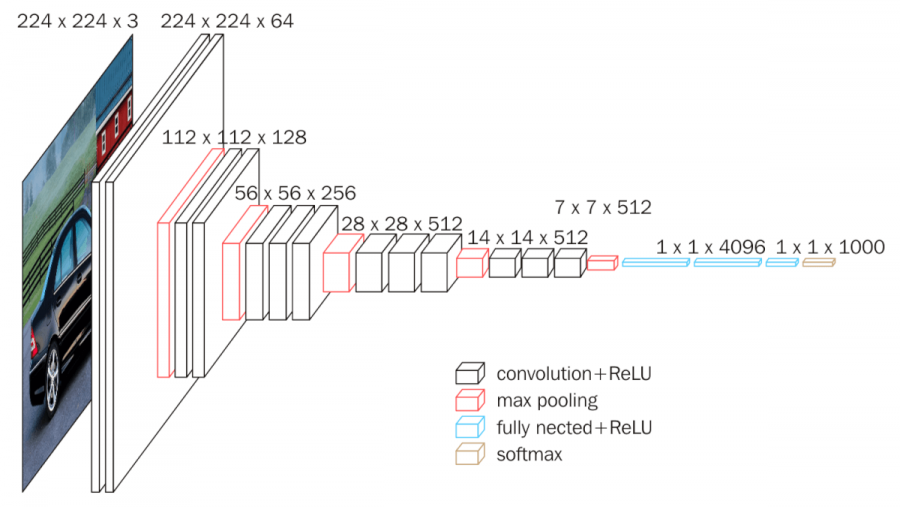

In [3]:
Image.open('vgg16.png')

---
#### VGGNet11
---

In [4]:
class VGGNet11(nn.Module):
    def __init__(self,classes:int):
        super().__init__()

        self.conv_layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=64,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.sub_sampling_layer1 = nn.MaxPool2d(kernel_size=2,stride=2)


        self.conv_layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.sub_sampling_layer2 = nn.MaxPool2d(kernel_size=2,stride=2)


        self.conv_layer3 = nn.Sequential(
            nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.conv_layer4 = nn.Sequential(
            nn.Conv2d(in_channels=256,out_channels=256,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.sub_sampling_layer3 = nn.MaxPool2d(kernel_size=2,stride=2)

        
        self.conv_layer5 = nn.Sequential(
            nn.Conv2d(in_channels=256,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.conv_layer6 = nn.Sequential(
            nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.sub_sampling_layer4 = nn.MaxPool2d(kernel_size=2,stride=2)

        
        self.conv_layer7 = nn.Sequential(
            nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.conv_layer8 = nn.Sequential(
            nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.sub_sampling_layer5 = nn.MaxPool2d(kernel_size=2,stride=2)


        self.avg_pool = nn.AdaptiveAvgPool2d(output_size=7)
        self.flatten = nn.Flatten()


        self.fc_layer1 = nn.Sequential(
            nn.Linear(512*7*7,4096),
            nn.ReLU(),
            nn.Dropout(0.5))
        self.fc_layer2 = nn.Sequential(
            nn.Linear(4096,4096),
            nn.ReLU(),
            nn.Dropout(0.5))
        self.output_layer = nn.Sequential(
            nn.Linear(4096,classes),
            nn.ReLU(),
            nn.Dropout(0.5))

    def forward(self,x):
        x=self.conv_layer1(x)
        x=self.sub_sampling_layer1(x)
        x=self.conv_layer2(x)
        x=self.sub_sampling_layer2(x)
        x=self.conv_layer3(x)
        x=self.conv_layer4(x)
        x=self.sub_sampling_layer3(x)
        x=self.conv_layer5(x)
        x=self.conv_layer6(x)
        x=self.sub_sampling_layer4(x)
        x=self.conv_layer7(x)
        x=self.conv_layer8(x)
        x=self.sub_sampling_layer5(x)
        x=self.avg_pool(x)
        x=self.flatten(x)
        x=self.fc_layer1(x)
        x=self.fc_layer2(x)
        x=self.output_layer(x)

        return x

In [5]:
model = VGGNet11(1000)
summary(model,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
       BatchNorm2d-2         [-1, 64, 224, 224]             128
              ReLU-3         [-1, 64, 224, 224]               0
         MaxPool2d-4         [-1, 64, 112, 112]               0
            Conv2d-5        [-1, 128, 112, 112]          73,856
       BatchNorm2d-6        [-1, 128, 112, 112]             256
              ReLU-7        [-1, 128, 112, 112]               0
         MaxPool2d-8          [-1, 128, 56, 56]               0
            Conv2d-9          [-1, 256, 56, 56]         295,168
      BatchNorm2d-10          [-1, 256, 56, 56]             512
             ReLU-11          [-1, 256, 56, 56]               0
           Conv2d-12          [-1, 256, 56, 56]         590,080
      BatchNorm2d-13          [-1, 256, 56, 56]             512
             ReLU-14          [-1, 256,

---
#### VGGNet13
---

In [6]:
class VGGNet13(nn.Module):
    def __init__(self,classes:int):
        super().__init__()

        self.conv_layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=64,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.conv_layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64,out_channels=64,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.sub_sampling_layer1 = nn.MaxPool2d(kernel_size=2,stride=2)


        self.conv_layer3 = nn.Sequential(
            nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.conv_layer4 = nn.Sequential(
            nn.Conv2d(in_channels=128,out_channels=128,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.sub_sampling_layer2 = nn.MaxPool2d(kernel_size=2,stride=2)


        self.conv_layer5 = nn.Sequential(
            nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.conv_layer6 = nn.Sequential(
            nn.Conv2d(in_channels=256,out_channels=256,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.sub_sampling_layer3 = nn.MaxPool2d(kernel_size=2,stride=2)

        
        self.conv_layer7 = nn.Sequential(
            nn.Conv2d(in_channels=256,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.conv_layer8 = nn.Sequential(
            nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.sub_sampling_layer4 = nn.MaxPool2d(kernel_size=2,stride=2)

        
        self.conv_layer9 = nn.Sequential(
            nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.conv_layer10 = nn.Sequential(
            nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.sub_sampling_layer5 = nn.MaxPool2d(kernel_size=2,stride=2)

        self.avg_pool = nn.AdaptiveAvgPool2d(output_size=7)
        self.flatten = nn.Flatten()


        self.fc_layer1 = nn.Sequential(
            nn.Linear(512*7*7,4096),
            nn.ReLU(),
            nn.Dropout(0.5))
        self.fc_layer2 = nn.Sequential(
            nn.Linear(4096,4096),
            nn.ReLU(),
            nn.Dropout(0.5))
        self.output_layer = nn.Sequential(
            nn.Linear(4096,classes),
            nn.ReLU(),
            nn.Dropout(0.5))

    def forward(self,x):
        x=self.conv_layer1(x)
        x=self.conv_layer2(x)
        x=self.sub_sampling_layer1(x)
        x=self.conv_layer3(x)
        x=self.conv_layer4(x)
        x=self.sub_sampling_layer2(x)
        x=self.conv_layer5(x)
        x=self.conv_layer6(x)
        x=self.sub_sampling_layer3(x)
        x=self.conv_layer7(x)
        x=self.conv_layer8(x)
        x=self.sub_sampling_layer4(x)
        x=self.conv_layer9(x)
        x=self.conv_layer10(x)
        x=self.sub_sampling_layer5(x)
        x=self.avg_pool(x)
        x=self.flatten(x)
        x=self.fc_layer1(x)
        x=self.fc_layer2(x)
        x=self.output_layer(x)

        return x

In [7]:
model = VGGNet13(1000)
summary(model,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
       BatchNorm2d-2         [-1, 64, 224, 224]             128
              ReLU-3         [-1, 64, 224, 224]               0
            Conv2d-4         [-1, 64, 224, 224]          36,928
       BatchNorm2d-5         [-1, 64, 224, 224]             128
              ReLU-6         [-1, 64, 224, 224]               0
         MaxPool2d-7         [-1, 64, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]          73,856
       BatchNorm2d-9        [-1, 128, 112, 112]             256
             ReLU-10        [-1, 128, 112, 112]               0
           Conv2d-11        [-1, 128, 112, 112]         147,584
      BatchNorm2d-12        [-1, 128, 112, 112]             256
             ReLU-13        [-1, 128, 112, 112]               0
        MaxPool2d-14          [-1, 128,

---
#### VGGNet16
---

In [8]:
class VGGNet16(nn.Module):
    def __init__(self,classes:int):
        super().__init__()

        self.conv_layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=64,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.conv_layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64,out_channels=64,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.sub_sampling_layer1 = nn.MaxPool2d(kernel_size=2,stride=2)


        self.conv_layer3 = nn.Sequential(
            nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.conv_layer4 = nn.Sequential(
            nn.Conv2d(in_channels=128,out_channels=128,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.sub_sampling_layer2 = nn.MaxPool2d(kernel_size=2,stride=2)


        self.conv_layer5 = nn.Sequential(
            nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.conv_layer6 = nn.Sequential(
            nn.Conv2d(in_channels=256,out_channels=256,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.conv_layer7 = nn.Sequential(
            nn.Conv2d(in_channels=256,out_channels=256,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.sub_sampling_layer3 = nn.MaxPool2d(kernel_size=2,stride=2)

        
        self.conv_layer8 = nn.Sequential(
            nn.Conv2d(in_channels=256,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.conv_layer9 = nn.Sequential(
            nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.conv_layer10 = nn.Sequential(
            nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.sub_sampling_layer4 = nn.MaxPool2d(kernel_size=2,stride=2)

        
        self.conv_layer11 = nn.Sequential(
            nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.conv_layer12 = nn.Sequential(
            nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.conv_layer13 = nn.Sequential(
            nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.sub_sampling_layer5 = nn.MaxPool2d(kernel_size=2,stride=2)

        self.avg_pool = nn.AdaptiveAvgPool2d(output_size=7)
        self.flatten = nn.Flatten()


        self.fc_layer1 = nn.Sequential(
            nn.Linear(512*7*7,4096),
            nn.ReLU(),
            nn.Dropout(0.5))
        self.fc_layer2 = nn.Sequential(
            nn.Linear(4096,4096),
            nn.ReLU(),
            nn.Dropout(0.5))
        self.output_layer = nn.Sequential(
            nn.Linear(4096,classes),
            nn.ReLU(),
            nn.Dropout(0.5))

    def forward(self,x):
        x=self.conv_layer1(x)
        x=self.conv_layer2(x)
        x=self.sub_sampling_layer1(x)
        x=self.conv_layer3(x)
        x=self.conv_layer4(x)
        x=self.sub_sampling_layer2(x)
        x=self.conv_layer5(x)
        x=self.conv_layer6(x)
        x=self.conv_layer7(x)
        x=self.sub_sampling_layer3(x)
        x=self.conv_layer8(x)
        x=self.conv_layer9(x)
        x=self.conv_layer10(x)
        x=self.sub_sampling_layer4(x)
        x=self.conv_layer11(x)
        x=self.conv_layer12(x)
        x=self.conv_layer13(x)
        x=self.sub_sampling_layer5(x)
        x=self.avg_pool(x)
        x=self.flatten(x)
        x=self.fc_layer1(x)
        x=self.fc_layer2(x)
        x=self.output_layer(x)

        return x

In [9]:
model = VGGNet16(1000)
summary(model,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
       BatchNorm2d-2         [-1, 64, 224, 224]             128
              ReLU-3         [-1, 64, 224, 224]               0
            Conv2d-4         [-1, 64, 224, 224]          36,928
       BatchNorm2d-5         [-1, 64, 224, 224]             128
              ReLU-6         [-1, 64, 224, 224]               0
         MaxPool2d-7         [-1, 64, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]          73,856
       BatchNorm2d-9        [-1, 128, 112, 112]             256
             ReLU-10        [-1, 128, 112, 112]               0
           Conv2d-11        [-1, 128, 112, 112]         147,584
      BatchNorm2d-12        [-1, 128, 112, 112]             256
             ReLU-13        [-1, 128, 112, 112]               0
        MaxPool2d-14          [-1, 128,

---
#### VGGNet19
---

In [10]:
class VGGNet19(nn.Module):
    def __init__(self,classes:int):
        super().__init__()

        self.conv_layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=64,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.conv_layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64,out_channels=64,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.sub_sampling_layer1 = nn.MaxPool2d(kernel_size=2,stride=2)


        self.conv_layer3 = nn.Sequential(
            nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.conv_layer4 = nn.Sequential(
            nn.Conv2d(in_channels=128,out_channels=128,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.sub_sampling_layer2 = nn.MaxPool2d(kernel_size=2,stride=2)


        self.conv_layer5 = nn.Sequential(
            nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.conv_layer6 = nn.Sequential(
            nn.Conv2d(in_channels=256,out_channels=256,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.conv_layer7 = nn.Sequential(
            nn.Conv2d(in_channels=256,out_channels=256,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.conv_layer8 = nn.Sequential(
            nn.Conv2d(in_channels=256,out_channels=256,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.sub_sampling_layer3 = nn.MaxPool2d(kernel_size=2,stride=2)

        
        self.conv_layer9 = nn.Sequential(
            nn.Conv2d(in_channels=256,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.conv_layer10 = nn.Sequential(
            nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.conv_layer11 = nn.Sequential(
            nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.conv_layer12 = nn.Sequential(
            nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.sub_sampling_layer4 = nn.MaxPool2d(kernel_size=2,stride=2)

        
        self.conv_layer13 = nn.Sequential(
            nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.conv_layer14 = nn.Sequential(
            nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.conv_layer15 = nn.Sequential(
            nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.conv_layer16 = nn.Sequential(
            nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.sub_sampling_layer5 = nn.MaxPool2d(kernel_size=2,stride=2)

        self.avg_pool = nn.AdaptiveAvgPool2d(output_size=7)
        self.flatten = nn.Flatten()


        self.fc_layer1 = nn.Sequential(
            nn.Linear(512*7*7,4096),
            nn.ReLU(),
            nn.Dropout(0.5))
        self.fc_layer2 = nn.Sequential(
            nn.Linear(4096,4096),
            nn.ReLU(),
            nn.Dropout(0.5))
        self.output_layer = nn.Sequential(
            nn.Linear(4096,classes),
            nn.ReLU(),
            nn.Dropout(0.5))

    def forward(self,x):
        x=self.conv_layer1(x)
        x=self.conv_layer2(x)
        x=self.sub_sampling_layer1(x)
        x=self.conv_layer3(x)
        x=self.conv_layer4(x)
        x=self.sub_sampling_layer2(x)
        x=self.conv_layer5(x)
        x=self.conv_layer6(x)
        x=self.conv_layer7(x)
        x=self.conv_layer8(x)
        x=self.sub_sampling_layer3(x)
        x=self.conv_layer9(x)
        x=self.conv_layer10(x)
        x=self.conv_layer11(x)
        x=self.conv_layer12(x)
        x=self.sub_sampling_layer4(x)
        x=self.conv_layer13(x)
        x=self.conv_layer14(x)
        x=self.conv_layer15(x)
        x=self.conv_layer16(x)
        x=self.sub_sampling_layer5(x)
        x=self.avg_pool(x)
        x=self.flatten(x)
        x=self.fc_layer1(x)
        x=self.fc_layer2(x)
        x=self.output_layer(x)
        return x

In [11]:
model = VGGNet19(1000)
summary(model,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
       BatchNorm2d-2         [-1, 64, 224, 224]             128
              ReLU-3         [-1, 64, 224, 224]               0
            Conv2d-4         [-1, 64, 224, 224]          36,928
       BatchNorm2d-5         [-1, 64, 224, 224]             128
              ReLU-6         [-1, 64, 224, 224]               0
         MaxPool2d-7         [-1, 64, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]          73,856
       BatchNorm2d-9        [-1, 128, 112, 112]             256
             ReLU-10        [-1, 128, 112, 112]               0
           Conv2d-11        [-1, 128, 112, 112]         147,584
      BatchNorm2d-12        [-1, 128, 112, 112]             256
             ReLU-13        [-1, 128, 112, 112]               0
        MaxPool2d-14          [-1, 128,